# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# seta o visual para ficar no padrão
sns.set()

df_athletes = pd.read_csv('athlete_events.csv')
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [3]:
df_medalhistas_brasileiros = df_athletes.dropna(subset=['Medal'])
df_medalhistas_brasileiros = df_medalhistas_brasileiros[df_medalhistas_brasileiros['NOC']=='BRA']
df_medalhistas_brasileiros.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

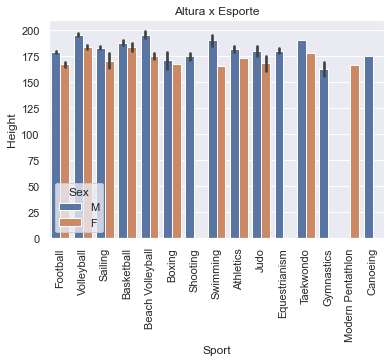

In [4]:
# Gráfico por Esportes x Altura (Masculino e Feminino)
sns.barplot(data=df_medalhistas_brasileiros, x='Sport', y='Height', hue='Sex');
plt.xticks(rotation=90);
plt.title('Altura x Esporte', loc='center');

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

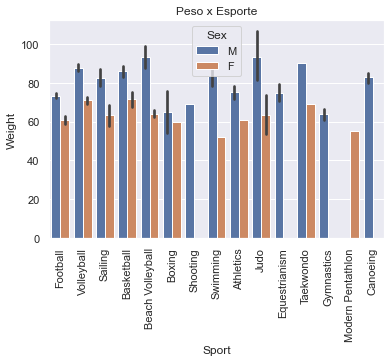

In [6]:
# Gráfico por Esportes x Peso (Masculino e Feminino)
sns.barplot(data=df_medalhistas_brasileiros, x='Sport', y='Weight', hue='Sex');
plt.xticks(rotation=90);
plt.title('Peso x Esporte', loc='center');

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [7]:
# series com os maiores medalhistas brasileiros (em quantidade de medalhas)
df_medal_brasil = df_medalhistas_brasileiros.groupby(by=['ID','Name'])['Medal'].count().sort_values(ascending=False).to_frame()

In [8]:
# merge para acrescentar a coluna total de medalhas ao data frame principal
df_merge_medals = pd.merge(df_medalhistas_brasileiros, df_medal_brasil, on=["ID", "ID"]).sort_values('Medal_y', ascending=False).head(21)

In [9]:
df_final2 = df_merge_medals.copy()

In [10]:
fig = px.histogram(df_final2, x="Name", color='Medal_x', color_discrete_map={'Gold':'gold','Silver':'silver','Bronze':'brown'}, 
                   template='plotly_dark',
                   labels={'Name': 'Atleta', 'count': 'Total de Medalhas', 'Medal_x': 'Legenda'})
fig.update_layout(title_text='Maiores Medalhistas Brasileiros',title_x=0.5) 
fig.show()

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [11]:
df_medalhistas_brasileiros_no_duplicates = df_medalhistas_brasileiros.drop_duplicates(subset=['Sport', 'Event', 'Year'])

In [12]:
df_noduplicates = df_final2.drop_duplicates(subset=['Sport','Event', 'Year'])

In [13]:
# tipos de medalhas por Esporte
fig = px.histogram(df_medalhistas_brasileiros_no_duplicates, x="Sport", color='Medal', 
                   color_discrete_map={'Gold':'gold','Silver':'silver','Bronze':'brown'}, 
                   template='plotly_dark',
                   labels={'Sport': 'Esporte', 'count': 'Total de Medalhas', 'Medal': 'Legenda'})
fig.update_layout(title_text='Medalhas por Esporte',title_x=0.5) 
fig.show()

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [14]:
# Eventos esportivos que renderam medalhas ao Brasil
fig = px.histogram(df_medalhistas_brasileiros_no_duplicates, x="Event", color='Medal', 
                   color_discrete_map={'Gold':'gold','Silver':'silver','Bronze':'brown'},
                   labels={'Event': 'Evento Esportivo', 'count': 'Total de Medalhas', 'Medal': 'Legenda'})
fig.update_layout(title_text='Medalhas por Evento Esportivo',title_x=0.5) 
fig.show()

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [15]:
fig = px.histogram(df_medalhistas_brasileiros_no_duplicates, x='Sport', color='Medal', 
                   color_discrete_map={'Gold':'gold','Silver':'silver','Bronze':'brown'}, 
                   template='xgridoff',
                   labels={'Sport': 'Esporte', 'count': 'Total de Medalhas', 'Medal': 'Legenda'})
fig.update_layout(title_text='Medalhas por Evento Esportivo',title_x=0.5) 
fig.show()

Repita o procedimento acima, mas com medalhas de ouro.

In [16]:
df_gold_medalists = df_medalhistas_brasileiros_no_duplicates[df_medalhistas_brasileiros_no_duplicates['Medal']=='Gold']

In [17]:
fig = px.histogram(df_gold_medalists, x='Sport',color='Medal', color_discrete_map={'Gold':'gold'}, 
                   template='gridon',
                   labels={'Sport': 'Esporte', 'count': 'Total de Medalhas', 'Medal': 'Legenda'})
fig.update_layout(title_text='Medalhas de Ouro por Esporte', title_x=0.5) 
fig.show()

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [18]:
pie_chart = px.pie(data_frame=df_gold_medalists, names='Sport', 
                   color_discrete_sequence=px.colors.sequential.YlOrRd_r,
                   template='plotly_dark')
pie_chart.update_layout(title_text='Medalhas de Ouro por Esporte', title_x=0.5) 
pie_chart.show()

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [19]:
# separando apenas os dados de medalhas em cada olimpiada. Groupby com medalha e contagem de nome ao invés de medal para que não haja duplicidade do titulo da coluna e,
# assim, seja possivel resetar os indices para criar um novo df.
# neste caso, o ['Name'].size retorna os dados de quantidade de nomes que ganharam determinada medalha naquele ano, portanto, resulta no mesmo que se fizessemos["Medal"].size, só 
# que da forma que foi feito, ão há duplicidade no nome da coluna do novo df.
df_medalists_por_olimpiada = df_medalhistas_brasileiros_no_duplicates.groupby(by=['Year', 'Medal'])['Name'].size().to_frame().reset_index()
# após criar o novo df contendo apenas os dados necessários, renomeia-se a coluna Name para Medalha, facilitando a leitura.
df_rename = df_medalists_por_olimpiada.rename(columns={'Name': 'Medalha'})
df_rename.head(2)

,Year,Medal,Medalha
0,1920,Bronze,1
1,1920,Gold,1


In [20]:
# plotando o gráfico onde "Medal" representa uma linha para cada tipo de dado do df, ou seja, uma linha para Gold, uma para Silver e uma para Bronze.
line_chart = px.line(df_rename, x='Year', color='Medal', y='Medalha',
                     color_discrete_map={'Gold':'gold','Silver':'silver','Bronze':'brown'}, 
                     labels={'Year': 'Ano',
                             'Medalha': 'Total de Medalhas'})
line_chart.update_layout(title_text='Histórico de Medalhas Brasileiras na História das Olimpiadas', title_x=0.5) 
line_chart.show()
